# Example axle calculation

Illustrate the creation of an axle calculation report. The formula's are mostly based on **Roloff/Matek - Maschinelemente** which can be found here (Springer link)[http://link.springer.com/book/10.1007%2F978-3-658-09082-1]

In [2]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pymech.fmt as fmt

In [3]:
G = fmt.Geometry(1000)
G.addpoint(fmt.Point(100, known=False))
G.addpoint(fmt.Point(400, f=-1000.))
G.addweight(fmt.Point(600), fmt.Point(800), -50.)
G.addpoint(fmt.Point(950, known=False))

In [4]:
S = fmt.Solver(G)
S.solve()

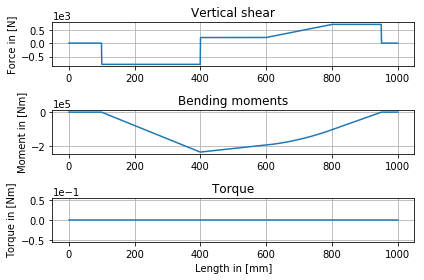

In [5]:
pl.subplot(311)
pl.plot(G.axle, S.V)
pl.grid(True)
pl.title('Vertical shear')
pl.ylabel('Force in [N]')
pl.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

pl.subplot(312)
pl.plot(G.axle, S.M)
pl.grid(True)
pl.title('Bending moments')
pl.ylabel('Moment in [Nm]')
pl.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

pl.subplot(313)
pl.plot(G.axle, S.T)
pl.grid(True)
pl.title('Torque')
pl.ylabel('Torque in [Nm]')
pl.xlabel('Length in [mm]')
pl.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

pl.tight_layout()